# COVID-19 East African Countries Dashboard
_last updated: April 19,2020._

### What is COVID-19

> Coronaviruses are a large family of viruses that may cause respiratory illnesses in humans ranging from common colds to more severe conditions such as Severe Acute Respiratory Syndrome (SARS) and Middle Eastern Respiratory Syndrome (MERS).1 'Novel coronavirus' is a new, previously unidentified strain of coronavirus. The novel coronavirus involved in the current outbreak has been named SARS-CoV-2 by the World Health Organization (WHO). 3The disease it causes has been named “coronavirus disease 2019” (or “COVID-19”).`

![](https://camo.githubusercontent.com/2fb766cd8fddab459c68eb0382cab7ca28c385f1/68747470733a2f2f7777772e617074612e636f6d2f77702d636f6e74656e742f75706c6f6164732f686f6d652d62616e6e65722d312e6a7067)


### Symptoms:
People may be sick with the virus for 1 to 14 days before developing symptoms. The most common symptoms of coronavirus disease (COVID-19) are fever, tiredness, and dry cough. Most people (about 80%) recover from the disease without needing special treatment.

- Cough
- Fever
- Tiredness
- Difficulty in breathing(severe cases)

In [2]:
# importing libraries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [3]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

# You can check the data in each df by running <df>.head()

In [4]:
# data cleaning
# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})

In [7]:
# Selecting the columns we need from the Country DF

afro_country_df_ind = country_df.set_index("iso3") # Set index to the column used to select rows.
afro_country_df_sel = afro_country_df_ind[["country","confirmed","deaths","recovered","active","incident_rate","mortality_rate"]]

# Select the rows that have the E.African countries. The data is from the index column above.
afro_country_df_ea = afro_country_df_sel.loc[["KEN","UGA","RWA","TZA","MUS","ZWE","MOZ","BDI","ETH","DJI","SSD","MDG","ZMB","SYC","SOM","ERI","MWI"]]

# Renaming the columns from the E.A data file.
afro_country_df_ea_ren = afro_country_df_ea.rename(columns={'country': 'Country','confirmed':'Confirmed Cases','deaths':'Reported Deaths',
                                                            'recovered':'Recovered Cases','active':'Currently Active Cases','incident_rate':'Incident Rate',
                                       'mortality_rate':'Mortality Rate'})

In [8]:
# Calculating total number of confirmed, death and recovered cases
confirmed_total = int(afro_country_df_ea['confirmed'].sum())
deaths_total = int(afro_country_df_ea['deaths'].sum())
recovered_total = int(afro_country_df_ea['recovered'].sum())
active_total = int(afro_country_df_ea['active'].sum())

In [9]:
# Displaying the total stats generated above.

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

### COVID-19 Cases by country

In [10]:
fig = go.FigureWidget( layout=go.Layout() )

# Creating a function to apply a background color to the column table.
def highlight_col(x):
    o = 'background-color: #FF851B'
    s = 'background-color: #DDDDDD'
    t = 'background-color: #39CCCC'
    l = 'background-color: #01FF70'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 0] = o
    df1.iloc[:, 1] = s
    df1.iloc[:, 2] = t
    df1.iloc[:, 3] = l
    
    return df1

# This s a reactive function to return the number of rows entered in the text box. When not using a widget, it displays a static 
# image base on the value entered on the <interact> call below.
def show_latest_cases(n): 
    n = int(n)
    return afro_country_df_ea_ren.sort_values('Confirmed Cases', ascending= False).head(n).style.apply(highlight_col, axis=None)

# Call to know number of rows to display.
interact(show_latest_cases, n='20')

# Display params.
ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='20', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

### COVID-19 cases per Country


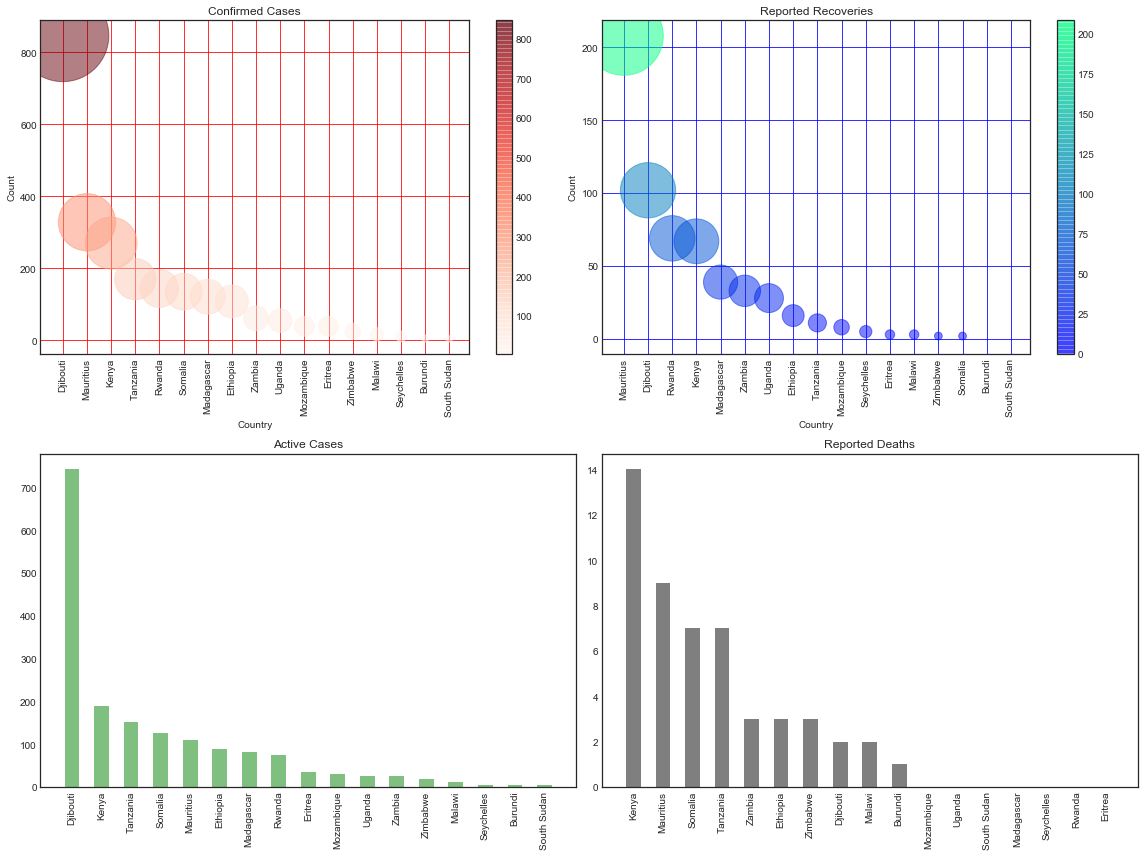

In [23]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 12)
plt.style.use('seaborn-white')


rng = afro_country_df_ea.sort_values('confirmed', ascending= False) # Sorting df.
# Assigning plot params
x = rng.country
y1 = rng.deaths
sizes1 = rng.deaths*100
colors1 = rng.deaths/100
colors = plt.cm.Dark2(rng.deaths)

rng4 = afro_country_df_ea.sort_values('deaths', ascending= False) # Sorting df.
x5 = rng4.country
y5 = rng4.deaths

rng2 = afro_country_df_ea.sort_values('recovered', ascending= False)# Sorting df.
# Assigning plot params
x2 = rng2.country
y2 = rng2.recovered
sizes2 = rng2.recovered*30
colors2 = rng2.recovered

rng3 = afro_country_df_ea.sort_values('active', ascending= False)# Sorting df.
# Assigning plot params
x3 = rng3.country
y4 = rng3.active
y3 = rng.confirmed
sizes3 = rng.confirmed*10
colors3 = rng.confirmed

# Plotting
plt.subplot(2,2,1) # This plot resides in index 1 (top left) of the 1 of 2 rows.
plt.scatter(x, y3, c=colors3, s=sizes3, alpha=0.5,
            cmap='Reds')
plt.xticks(x, rotation='vertical')
plt.xlabel('Country')
plt.title('Confirmed Cases')
plt.ylabel('Count')
plt.grid(b=True, color='r')
plt.colorbar(); 

plt.subplot(2,2,4) # This plot resides in index 3 (bottom left) of the 2 of 2 rows.
ax = plt.bar(x5, y5,color='k', width=0.5, alpha=0.5)
plt.xticks(x, rotation='vertical')
plt.title('Reported Deaths')

plt.subplot(2,2,3) # This plot resides in index 3 (bottom left) of the 2 of 2 rows.
ax = plt.bar(x3, y4,color='g', width=0.5, alpha=0.5)
plt.xticks(x, rotation='vertical')
plt.title('Active Cases')


plt.subplot(2,2,2) # This plot resides in index 2 (top right) of the 1 of 2 rows.
plt.scatter(x2, y2, c=colors2, s=sizes2, alpha=0.5,
            cmap='winter')
plt.xticks(x, rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Reported Recoveries')
plt.grid(b=True, color='b')
plt.colorbar();
plt.tight_layout()

### Confirmed cases per Country

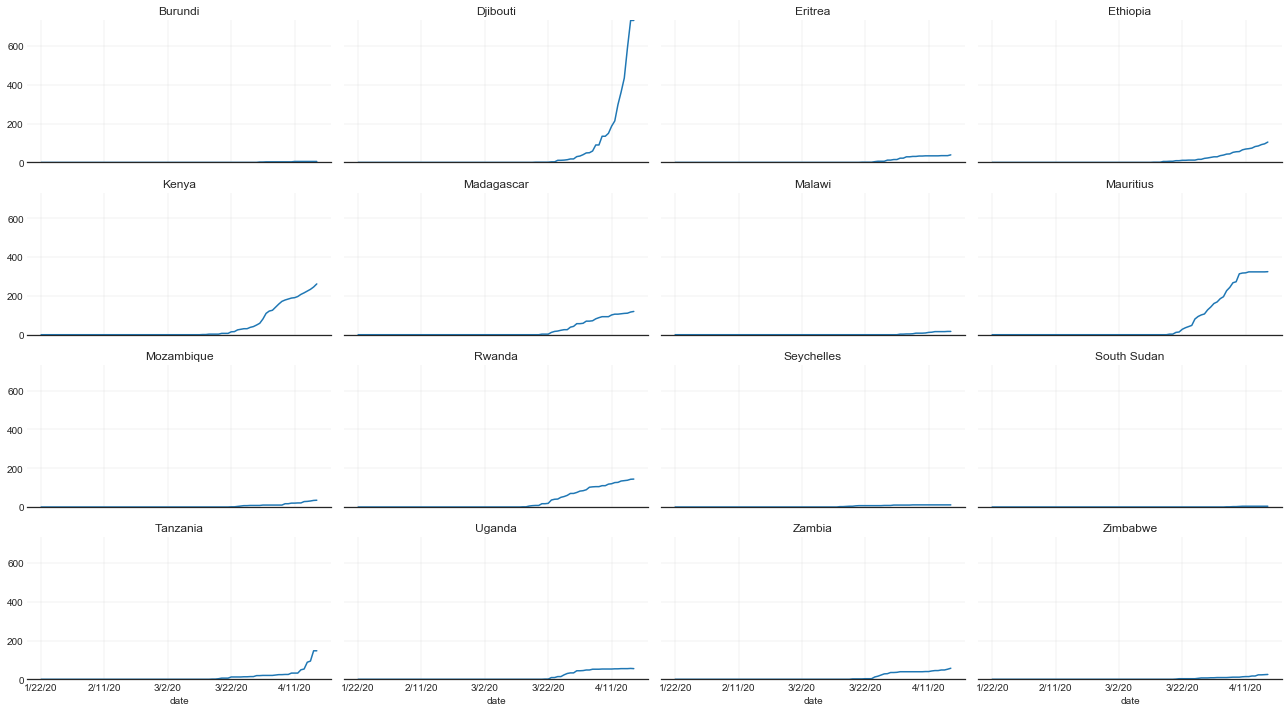

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey='row', figsize=(18,10))
axes_list = [item for sublist in axes for item in sublist] 

# Transposing data from wide to long.
df=pd.melt(confirmed_df,id_vars=['state', 'country','lat','long'],var_name='date', value_name='values')

# Subset E.African countries only.
df_ea = df[df['country'].isin(["Kenya","Uganda","Tanzania","Rwanda","Malawi","Eritrea","Seychelles","Zambia","Madagascar","South Sudan",
                              "Djibouti","Ethiopia","Burundi","Mozambique","Zimbabwe","Mauritius"])]

# Get min and max values for the y limits.
y_min = df_ea['values'].min()
y_max = df_ea['values'].max()

#Plotting
for countryname, selection in df_ea.groupby("country"):
    ax = axes_list.pop(0)
    selection.plot(x='date', y='values',label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_ylim((y_min, y_max))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.tight_layout() # This helps in getting a neat output, no overlay of plots.

    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

### Death cases per Country

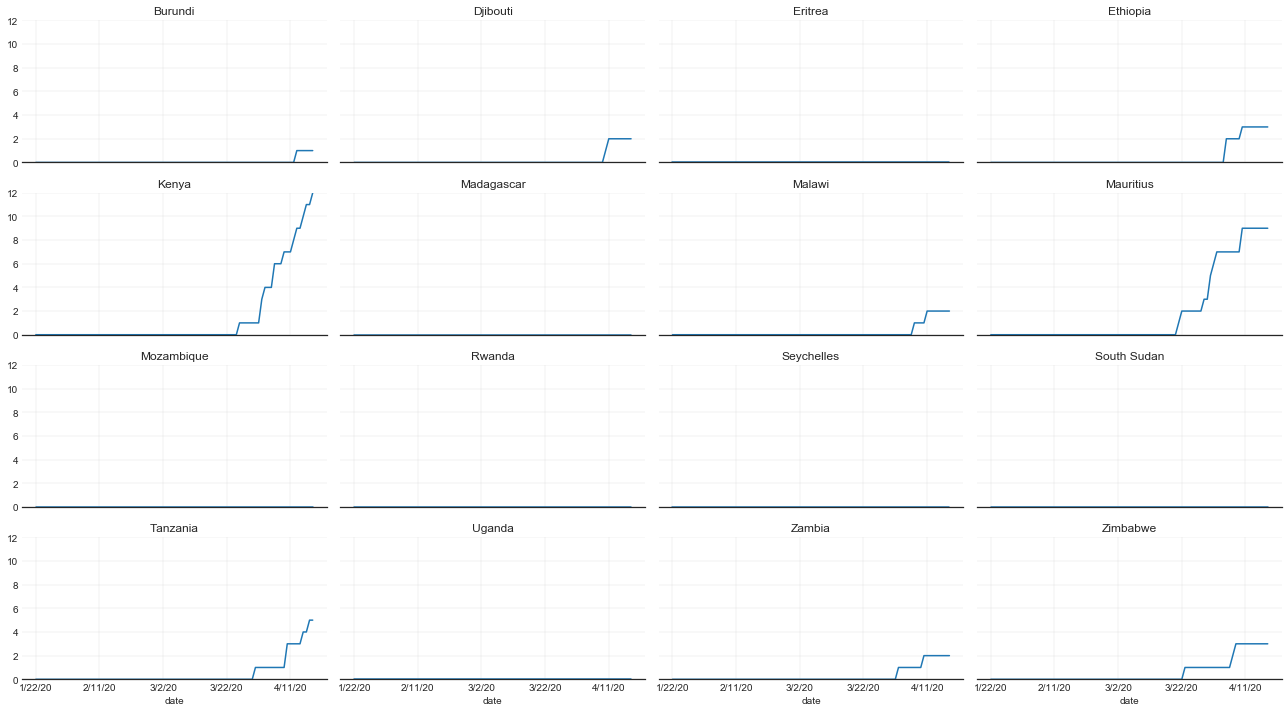

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey='row', figsize=(18,10))
axes_list = [item for sublist in axes for item in sublist] 

# Transposing data from wide to long.
df2=pd.melt(death_df,id_vars=['state', 'country','lat','long'],var_name='date', value_name='values')
# Subset E.African countries only.
df_ea2 = df2[df2['country'].isin(["Kenya","Uganda","Tanzania","Rwanda","Malawi","Eritrea","Seychelles","Zambia","Madagascar","South Sudan",
                              "Djibouti","Ethiopia","Burundi","Mozambique","Zimbabwe","Mauritius"])]

# Get min and max values for the y limits.
y_min = df_ea2['values'].min()
y_max = df_ea2['values'].max()

# Plotting.
for countryname, selection in df_ea2.groupby("country"):
    ax = axes_list.pop(0)
    selection.plot(x='date', y='values', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_ylim((y_min, y_max))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout() # This helps in getting a neat output, no overlay of plots.
    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

### Incident and Mortality Rates per Country

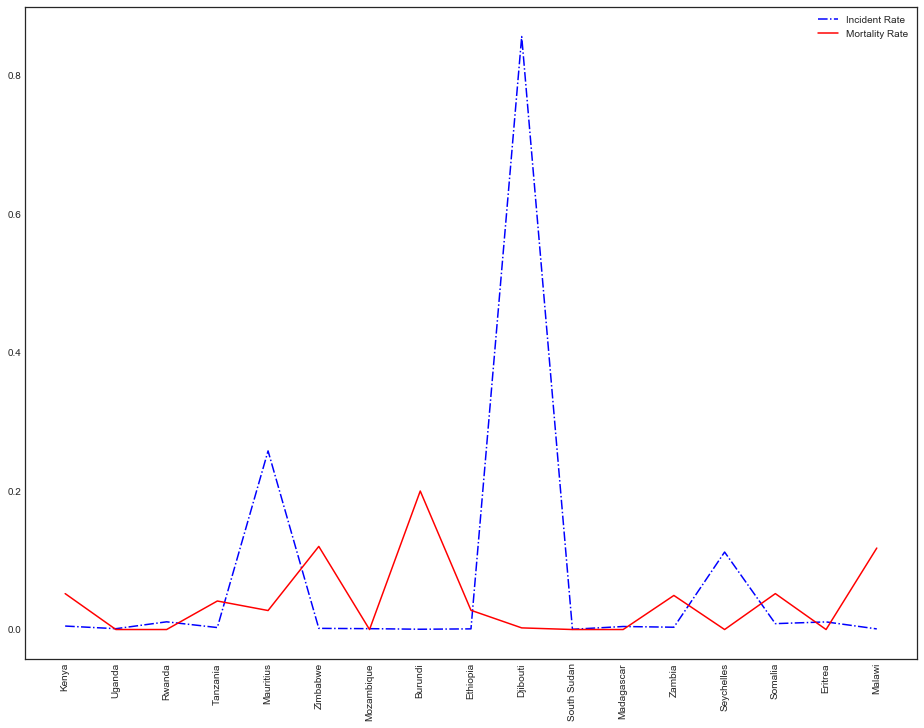

In [16]:
# Defining plot params.
x= afro_country_df_ea.country
ir= afro_country_df_ea.incident_rate/100 #This gives us rate not percent
dr= afro_country_df_ea.mortality_rate/100 #This gives us rate not percent

# Plotting
plt.plot(x,ir,'b-.',label='Incident Rate') # <b-.> gives us the dot, line and blue line.
plt.plot(x,dr,color='red',label='Mortality Rate')
plt.xticks(x, rotation='vertical')
plt.legend()

### Global spread

In [17]:
# Map config
world_map = folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map